# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Patricia Ho
- **Email:** patricia.ho@student.pradita.ac.id
- **ID Dicoding**: [patricia_ho_rKsF](https://www.dicoding.com/users/patricia_ho_rksf)

## Menentukan Pertanyaan Bisnis
1. Apa dampak hari libur terhadap jumlah penyewaan sepeda? 
2. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? 
3. Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda? 
4. Bagaimana suhu dan suhu yang dirasakan berkorelasi dengan jumlah penyewaan sepeda? 
5. Bagaimana tren penyewaan sepeda dari tahun ke tahun? Bulan dan tahun manakah yang memiliki permintaan penyewaan sepeda tertinggi/terendah? 
6. Bagaimana kecepatan angin mempengaruhi penyewaan sepeda? 
7. Siapa yang lebih banyak menggunakan layanan penyewaan sepeda, pengguna biasa atau pengguna terdaftar?
8. Pada jam berapa saja penyewaan sepeda memiliki pengguna terbanyak dan tersedikit?

## Import Semua Packages/Library yang Digunakan

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [158]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Wrangling

### Gathering Data

In [159]:
day_file_path = "data/day.csv"
hour_file_path = "data/hour.csv"

day_df = pd.read_csv(day_file_path)
hour_df = pd.read_csv(hour_file_path)

- Membaca data yang ada pada day.csv dan hour.csv

In [160]:
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Melihat format data yang ada pada day.csv dan hour.csv

In [161]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

- Mencari tau tipe data yang digunakan pada setiap field yang ada

### Assessing Data

In [162]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"]).dt.strftime("%Y-%m-%d")
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"]).dt.strftime("%Y-%m-%d")

- Mengubah data dteday menjadi datetime, yang sebelumnya merupakan tipe data objek

In [163]:
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Mengecek apakah day.csv dan hour.csv ada missing value
- Berdasarkan hasil yang ada, tidak ada missing value yang menandakan bahwa bisa digunakan secara akurat

In [164]:
print("Duplicated Data (Day): ", day_df.duplicated().sum())
print("Duplcated Data (Hour): ", hour_df.duplicated().sum())

Duplicated Data (Day):  0
Duplcated Data (Hour):  0


- Mengecek apakah ada duplikasi data dari kedua csv
- Tidak ada duplikasi berdasarkan hasil, yang artinya data semua sudah aman secara pendataan

In [165]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Melakukan pengecekan apakah ada data yang tidak normal pada kedua csv

### Cleaning Data

In [193]:
df_combined = pd.concat([day_df, hour_df], ignore_index=True)
df_combined.sort_values(by=['dteday', 'hr'], inplace=True)

In [194]:
df_combined.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
731,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
732,2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
733,3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2
734,4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,3
735,5,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [195]:
df_combined.to_csv("data/combined_data.csv", index=False)

- Memasukkan hasil merge antara day.csv dan hour.csv

In [196]:
df_combined.isna().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

- Melakukan pengecekan terhadap field yang kosong

In [171]:
df_combined_clean = df_combined.dropna(subset=['hr']).copy()

df_combined_clean['dteday'] = pd.to_datetime(df_combined_clean['dteday'])
df_combined_clean['dteday'] = df_combined_clean.apply(lambda row: row['dteday'] + pd.Timedelta(hours=row['hr']), axis=1)
df_combined_clean.drop(columns=['hr', 'mnth', 'yr'], inplace=True)
df_combined_clean.to_csv("data/combined_data_clean.csv", index=False)

- Melakukan pembersihan data dengan menggabungkan jam dan tanggal (waktu) dengan dteday, untuk menciptakan hasil data yang lebih clean
- Membuang data yang dimana field hr tidak ada isinya

## Exploratory Data Analysis (EDA)

Disini saya menginisialisasi parsing data untuk data "dteday" supaya tidak sulit untuk memecah data satu per satu

In [172]:
year = df_combined_clean['dteday'].dt.year.rename('year')
month = df_combined_clean['dteday'].dt.month.rename('month')
day = df_combined_clean['dteday'].dt.day.rename('day')
hour = df_combined_clean['dteday'].dt.hour.rename('hour')

### Eksplorasi Perbandingan Hari libur dan Hari Biasa terhadap Penyewaan Sepeda

Untuk hal ini, saya mengeksplorasi dengan field dteday dan holiday, hal ini akan digunakan untuk melihat perbandingan jumlah pengguna penyewaan sepeda disaat hari libur atau tidak

- Disini saya perlu membuat data menjadi sebuah satu field untuk tujuan visualisasi 

In [173]:
comparison_holiday_user = df_combined_clean.groupby(
    [df_combined_clean['dteday'].dt.year.rename('year'), 
     df_combined_clean['dteday'].dt.month.rename('month'), 
     "holiday"]
).agg(cnt_sum=('cnt', 'sum'), cnt_mean=('cnt', 'mean')).reset_index()

# Convert 'year' and 'month' to string to facilitate plotting
comparison_holiday_user['year'] = comparison_holiday_user['year'].astype(str)
comparison_holiday_user['month'] = comparison_holiday_user['month'].astype(str)
comparison_holiday_user['holiday'] = comparison_holiday_user['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'}).astype('category')
# Create a new column 'year_month' to combine 'year' and 'month' for clearer x-axis labels
comparison_holiday_user['year_month'] = comparison_holiday_user['year'] + '-' + comparison_holiday_user['month'].str.zfill(2)

comparison_holiday_user

df_combined_clean.groupby('holiday')['cnt'].mean()

,year,month,holiday,cnt_sum,cnt_mean,year_month
0,2011,1,Non-Holiday,37189,56.007530,2011-01
1,2011,1,Holiday,1000,41.666667,2011-01
2,2011,2,Non-Holiday,47108,75.372800,2011-02
3,2011,2,Holiday,1107,46.125000,2011-02
4,2011,3,Non-Holiday,64045,87.732877,2011-03
5,2011,4,Non-Holiday,91744,132.005755,2011-04
6,2011,4,Holiday,3126,130.250000,2011-04
7,2011,5,Non-Holiday,131723,182.948611,2011-05
8,2011,5,Holiday,4098,170.750000,2011-05
9,2011,6,Non-Holiday,143512,199.322222,2011-06


holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64

### Eksplorasi Musim dan Jumlah Penyewaan Sepeda

Disini saya melakukan eksplorasi terkait musim dan juga jumlah penyewaan sepeda. Tujuannya untuk melihat seberapa sering orang menyewa sepeda berdasarkan musim yang ada

In [174]:
seasons_list = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}

df_combined_clean = df_combined_clean.copy()

df_combined_clean['seasons_descriptive'] = df_combined_clean['season'].map(seasons_list)

comparison_seasons = df_combined_clean.groupby(by=["season","seasons_descriptive"]).agg({
    "cnt": ["sum", "mean"],
})
comparison_seasons.columns = ['Total Rentals', 'Average Rentals']
comparison_seasons.reset_index(inplace=True)
comparison_seasons

,season,seasons_descriptive,Total Rentals,Average Rentals
0,1,Musim Semi,471348,111.114569
1,2,Musim Panas,918589,208.344069
2,3,Musim Gugur,1061129,236.016237
3,4,Musim Dingin,841613,198.868856


### Eksplorasi Cuaca dengan Jumlah Penyewaan Sepeda

Disini saya melakukan eksplorasi terkait cuaca dan juga jumlah penyewaan sepeda. Tujuannya untuk melihat seberapa sering orang menyewa sepeda berdasarkan cuaca yang ada

In [175]:
weather_conditions = {
    1: "Cerah, Sedikit Awan, Sebagian Awan",
    2: "Kabut + Sedikit Awan, Mist Kabut + Sebagian Awan, Mist Kabut + Pecah Awan, Mist Kabut + Awan",
    3: "Salju Ringan, Hujan Ringan + Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar",
    4: "Hujan Lebat + Es Pallet + Badai Petir + Kabut, Salju + Kabut"
}

df_combined_clean['weathersit_descriptive'] = df_combined_clean['weathersit'].map(weather_conditions)
weather_agg_sum = df_combined_clean.groupby('weathersit_descriptive')['cnt'].sum().reset_index()
weather_agg_mean = df_combined_clean.groupby('weathersit_descriptive')['cnt'].mean().reset_index()

weather_agg_mean
weather_agg_sum

,weathersit_descriptive,cnt
0,"Cerah, Sedikit Awan, Sebagian Awan",204.869272
1,"Hujan Lebat + Es Pallet + Badai Petir + Kabut,...",74.333333
2,"Kabut + Sedikit Awan, Mist Kabut + Sebagian Aw...",175.165493
3,"Salju Ringan, Hujan Ringan + Petir + Awan Ters...",111.579281


,weathersit_descriptive,cnt
0,"Cerah, Sedikit Awan, Sebagian Awan",2338173
1,"Hujan Lebat + Es Pallet + Badai Petir + Kabut,...",223
2,"Kabut + Sedikit Awan, Mist Kabut + Sebagian Aw...",795952
3,"Salju Ringan, Hujan Ringan + Petir + Awan Ters...",158331


### Eksplorasi untuk mencari korelasi antara suhu + suhu yang dirasakan dengan jumlah penyewaan sepeda

Disini saya melakukan eksplorasi untuk mencari korelasi antara suhu, suhu yang dirasakan , dan jumlah penyewaan sepeda. Ini untuk melihat seberapa terkait variabel - variabel tersebut

In [176]:
# Calculate correlation coefficients
correlation_matrix = df_combined_clean[['temp', 'atemp', 'cnt']].corr()
correlation_matrix

# Calculate covariance matrix
covariance_matrix = df_combined_clean[['temp', 'atemp', 'cnt']].cov()
covariance_matrix

,temp,atemp,cnt
temp,1.000000,0.987672,0.404772
atemp,0.987672,1.000000,0.400929
cnt,0.404772,0.400929,1.000000


,temp,atemp,cnt
temp,0.037078,0.032683,14.137600
atemp,0.032683,0.029532,12.497567
cnt,14.137600,12.497567,32901.461104


In [177]:
bins = [df_combined_clean['temp'].min(), 0.25, 0.5, 0.75, df_combined_clean['temp'].max()]
labels = ['Dingin', 'Sejuk', 'Hangat', 'Panas']
df_combined_clean['temp_category'] = pd.cut(df_combined_clean['temp'], bins=bins, labels=labels, include_lowest=True)

comparison_temp_category = df_combined_clean.groupby('temp_category', observed=True).agg({
    "cnt": ["size", "sum", "mean"],
})

# Define bins for 'atemp' similar to 'temp'
bins_atemp = [df_combined_clean['atemp'].min(), 0.25, 0.5, 0.75, df_combined_clean['atemp'].max()]
df_combined_clean['atemp_category'] = pd.cut(df_combined_clean['atemp'], bins=bins_atemp, labels=labels, include_lowest=True)

# Perform groupby on 'atemp_category'
comparison_atemp_category = df_combined_clean.groupby('atemp_category', observed=True).agg({
    "cnt": ["size", "sum", "mean"],
})

# Flatten the MultiIndex for comparison_temp_category
comparison_temp_category.columns = ['_'.join(col).strip() for col in comparison_temp_category.columns.values]
comparison_temp_category.reset_index(inplace=True)

# Do the same for comparison_atemp_category
comparison_atemp_category.columns = ['_'.join(col).strip() for col in comparison_atemp_category.columns.values]
comparison_atemp_category.reset_index(inplace=True)

comparison_temp_category
comparison_atemp_category



,temp_category,cnt_size,cnt_sum,cnt_mean
0,Dingin,2013,140901,69.995529
1,Sejuk,6847,1015921,148.374617
2,Hangat,6920,1603040,231.653179
3,Panas,1599,532817,333.218887


,atemp_category,cnt_size,cnt_sum,cnt_mean
0,Dingin,1952,148834,76.246926
1,Sejuk,7507,1129826,150.502997
2,Hangat,7223,1799020,249.068254
3,Panas,697,214999,308.463415


### Eksplorasi Trend Penyewaan Sepeda (Bulan dan Tahun)

Disini saya fokus dalam mencari tau tren dari tiap bulan ataupun tiap tahun, fungsinya untuk menbandingkan data per tahun dan perbulan, dan apakah ada bulan tertentu yang menjadi peak month (paling ramai)

In [178]:
monthly_rentals = df_combined_clean.groupby(by=[year.rename("Year"), month.rename("Month")]).agg({
    "cnt": ["sum", "mean"],
})
monthly_rentals

monthly_rentals.columns = ['Total Rentals', 'Average Rentals']

cnt            
               sum        mean
Year Month                    
2011 1       38189   55.507267
     2       48215   74.291217
     3       64045   87.732877
     4       94870  131.947149
     5      135821  182.555108
     6      143512  199.322222
     7      141341  189.974462
     8      136691  186.991792
     9      127418  177.709902
     10     123511  166.232840
     11     102167  142.095967
     12      87323  117.844804
2012 1       96744  130.558704
     2      103137  149.041908
     3      164875  221.904441
     4      174224  242.651811
     5      195865  263.259409
     6      202830  281.708333
     7      203607  273.665323
     8      214503  288.310484
     9      218573  303.573611
     10     198841  280.848870
     11     152664  212.623955
     12     123713  166.729111

### Eksplorasi Hubungan antara Kecepatan Angin dan Penyewaan Sepeda

Disini saya melakukan pencarian terkait korelasi antara kecepatan angin dan jumlah penyewaan sepeda secara umum. Tujuannya untuk mencari tau hubungan antara kedua variabel tersebut apakah saling terikat / saling berhubungan.

In [179]:
correlation_wind_count = df_combined_clean[['windspeed', 'cnt']].corr()
correlation_wind_count

# Define wind speed bins and labels
bins = [df_combined_clean['windspeed'].min(), 0.1, 0.2, df_combined_clean['windspeed'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_combined_clean['windspeed_category'] = pd.cut(df_combined_clean['windspeed'], bins=bins, labels=labels, include_lowest=True)

# Aggregate bike rentals by wind speed category
windspeed_effect = df_combined_clean.groupby('windspeed_category', observed=True)['cnt'].mean().reset_index()
windspeed_effect

,windspeed,cnt
windspeed,1.000000,0.093234
cnt,0.093234,1.000000


,windspeed_category,cnt
0,Rendah,156.451318
1,Sedang,184.978232
2,Tinggi,210.559360


### Eksplorasi Pengguna Biasa dan Terdaftar pada Penyewaan Sepeda

Disini saya melakukan eksplorasi untuk mengetahui seberapa banyak jumlah penyewaan sepeda berdasarkan jenis pengguna. Ini untuk melihat pengguna manakah yang lebih rentan dalam menyewa sepeda.

In [180]:
user_comparison_year_month = df_combined_clean.groupby(
    [df_combined_clean['dteday'].dt.year.rename('year'),
     df_combined_clean['dteday'].dt.month.rename('month')]
).agg(
    casual_sum=('casual', 'sum'),
    registered_sum=('registered', 'sum'),
).reset_index()

user_comparison_melted = user_comparison_year_month.melt(
    id_vars=['year', 'month'],
    value_vars=['casual_sum', 'registered_sum'],
    var_name='User_Type', 
    value_name='Count'
)

# Display the aggregated data
user_comparison_year_month
user_comparison_melted


,year,month,casual_sum,registered_sum
0,2011,1,3073,35116
1,2011,2,6242,41973
2,2011,3,12826,51219
3,2011,4,22346,72524
4,2011,5,31050,104771
5,2011,6,30612,112900
6,2011,7,36452,104889
7,2011,8,28842,107849
8,2011,9,26545,100873
9,2011,10,25222,98289


,year,month,User_Type,Count
0,2011,1,casual_sum,3073
1,2011,2,casual_sum,6242
2,2011,3,casual_sum,12826
3,2011,4,casual_sum,22346
4,2011,5,casual_sum,31050
5,2011,6,casual_sum,30612
6,2011,7,casual_sum,36452
7,2011,8,casual_sum,28842
8,2011,9,casual_sum,26545
9,2011,10,casual_sum,25222


### Eksplorasi Jumlah Pengguna yang Menyewa Sepeda (Jam)

Disini saya melakukan eksplorasi terhadap jam yang rentan ramai untuk menyewa sepeda, adapun disini juga ingin melihat perbandingan antara pengguna yang terdaftar dan juga yang tidak, kemudian dari situ akan dibandingkan hasilnya

In [181]:
average_hourly_user = df_combined_clean.groupby(by=[df_combined_clean['dteday'].dt.hour.rename('hour')]).agg(
    casual_sum=('casual', 'sum'),
    casual_mean=('casual', 'mean'),
    registered_sum=('registered', 'sum'),
    registered_mean=('registered', 'mean'),
    cnt_sum=('cnt', 'sum'),
    cnt_mean=('cnt', 'mean')
).reset_index()


average_hourly_user.columns = [''.join(col).strip() for col in average_hourly_user.columns.values]

# Reset the index if 'hour' is not already a column
average_hourly_user.reset_index(inplace=True)
average_hourly_user

,index,hour,casual_sum,casual_mean,registered_sum,registered_mean,cnt_sum,cnt_mean
0,0,0,7375,10.158402,31755,43.739669,39130,53.898072
1,1,1,4709,6.504144,19455,26.871547,24164,33.375691
2,2,2,3412,4.772028,12940,18.097902,16352,22.869930
3,3,3,1893,2.715925,6281,9.011478,8174,11.727403
4,4,4,874,1.253945,3554,5.098996,4428,6.352941
5,5,5,1012,1.411437,13249,18.478382,14261,19.889819
6,6,6,3017,4.161379,52115,71.882759,55132,76.044138
7,7,7,8037,11.055021,146134,201.009629,154171,212.064649
8,8,8,15761,21.679505,245240,337.331499,261001,359.011004
9,9,9,22458,30.891334,136980,188.418157,159438,219.309491


## Visualization & Explanatory Analysis

### Apa dampak hari libur terhadap jumlah penyewaan sepeda? 

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='holiday', ylabel='cnt'>

Text(0.5, 1.0, 'Perbandingan Rata-Rata Penyewaan Sepeda pada Hari Libur dan Bukan Hari Libur')

Text(0.5, 0, 'Jenis Hari')

Text(0, 0.5, 'Rata-Rata Penyewaan Sepeda')

([<matplotlib.axis.XTick at 0x177c96f00>,
 [Text(0, 0, 'Bukan Hari Libur'), Text(1, 0, 'Hari Libur')])

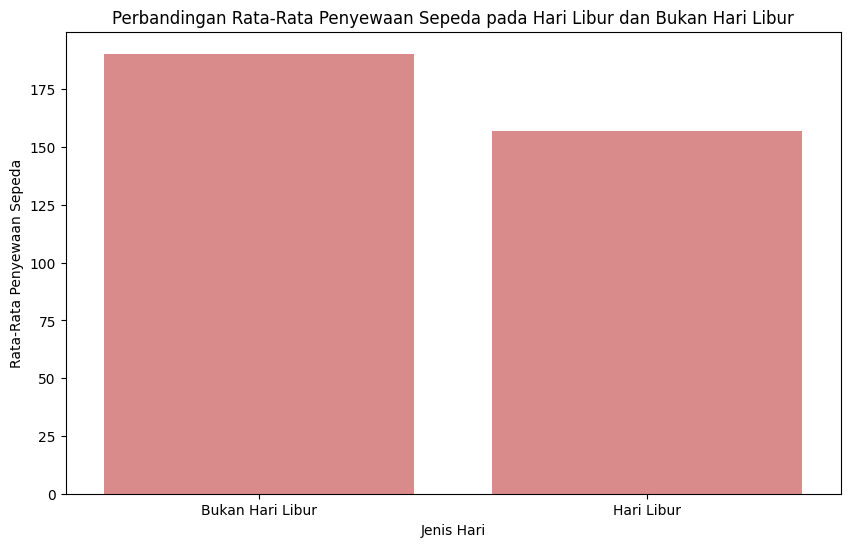

In [182]:
# Calculate the mean rentals for holidays vs non-holidays
mean_rentals_by_holiday = df_combined_clean.groupby('holiday')['cnt'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
color = 'tab:red'
sns.barplot(x='holiday', y='cnt', data=mean_rentals_by_holiday, color=color, alpha=0.6)
plt.title('Perbandingan Rata-Rata Penyewaan Sepeda pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])
plt.show()


<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='year_month', ylabel='cnt_mean'>

Text(0.5, 1.0, 'Perbandingan Rata-Rata Penyewaan Sepeda Berdasarkan Tahun dan Bulan: Hari Libur vs Bukan Hari Libur')

Text(0.5, 0, 'Year-Month (YYYY-MM)')

Text(0, 0.5, 'Rata-Rata Penyewaan Sepeda')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '2011-01'),
  Text(1, 0, '2011-02'),
  Text(2, 0, '2011-03'),
  Text(3, 0, '2011-04'),
  Text(4, 0, '2011-05'),
  Text(5, 0, '2011-06'),
  Text(6, 0, '2011-07'),
  Text(7, 0, '2011-08'),
  Text(8, 0, '2011-09'),
  Text(9, 0, '2011-10'),
  Text(10, 0, '2011-11'),
  Text(11, 0, '2011-12'),
  Text(12, 0, '2012-01'),
  Text(13, 0, '2012-02'),
  Text(14, 0, '2012-03'),
  Text(15, 0, '2012-04'),
  Text(16, 0, '2012-05'),
  Text(17, 0, '2012-06'),
  Text(18, 0, '2012-07'),
  Text(19, 0, '2012-08'),
  Text(20, 0, '2012-09'),
  Text(21, 0, '2012-10'),
  Text(22, 0, '2012-11'),
  Text(23, 0, '2012-12')])

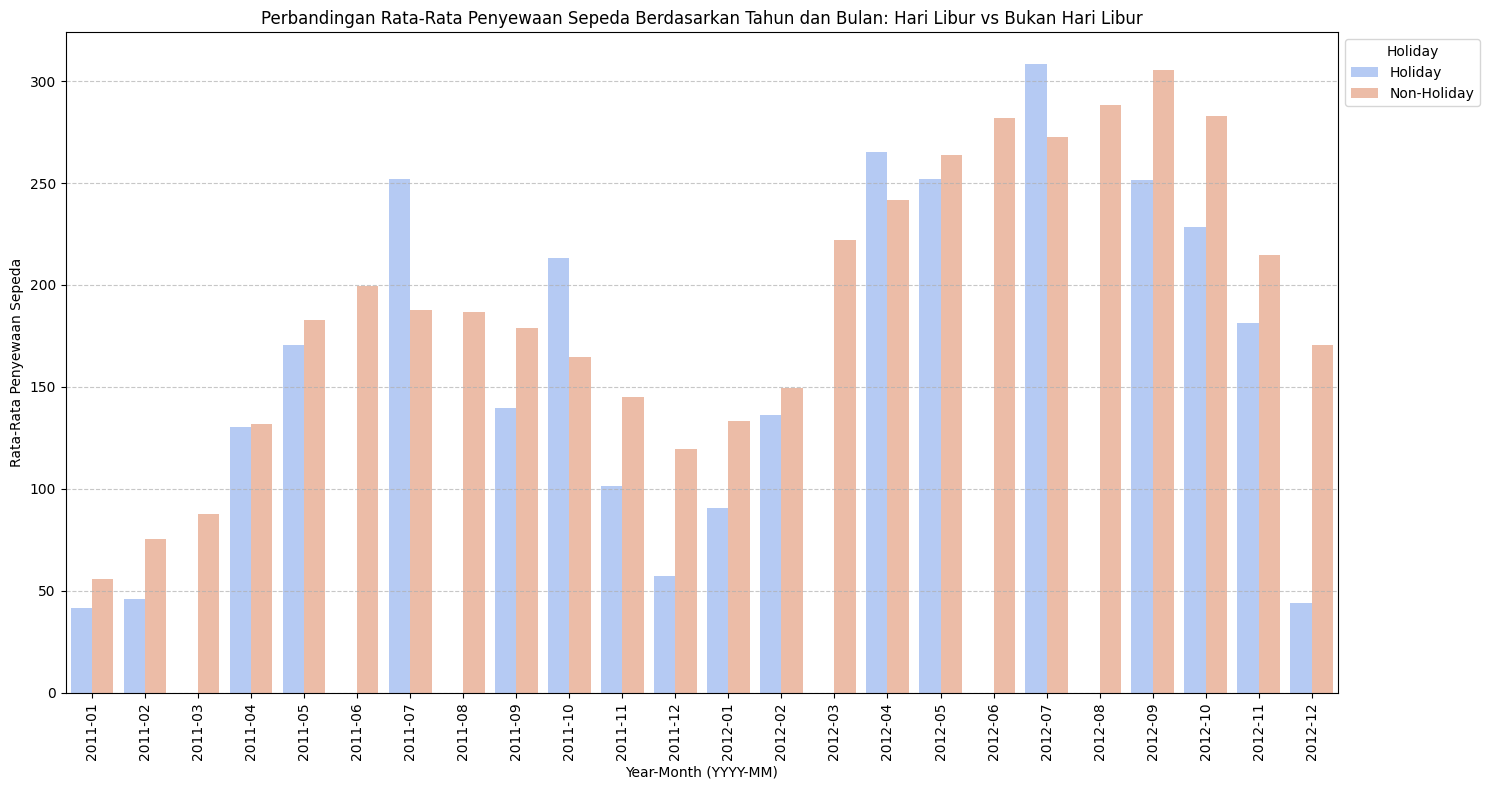

In [183]:
# Plotting
plt.figure(figsize=(15, 8))  # Consider making the figure larger
sns.barplot(x='year_month', y='cnt_mean', hue='holiday', data=comparison_holiday_user, palette='coolwarm')
plt.title('Perbandingan Rata-Rata Penyewaan Sepeda Berdasarkan Tahun dan Bulan: Hari Libur vs Bukan Hari Libur')
plt.xlabel('Year-Month (YYYY-MM)')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend(title='Holiday', loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for easier reading
plt.tight_layout()  # Adjust layout

plt.show()


- Visualisasi Pertama menunjukkan bahwa secara rata - rata, penyewaan sepeda lebih banyak secara jumlah pada saat bukan hari libur (Non-holiday), Hal ini bisa terjadi karena sepeda digunakan untuk transportasi (pergi dari satu tempat ke tempat yang lain), yang dilakukan sehari - hari
- Visualisasi kedua menunjukkan bahwa sebagian besar rata-rata orang menyewa sepeda pada hari kerja (non-holiday), namun pada beberapa bulan (Juli 2011, Oktober 2011, April 2012, Juli 2012) penyewaan sepeda lebih banyak dilakukan pada hari libur. Hal ini mungkin disebabkan oleh banyaknya orang yang tidak bekerja dan memilih untuk menyewa sepeda untuk kegiatan rekreasi.

### Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

Text(0.5, 0, 'Musim')

Text(0, 0.5, 'Total Rental')

<BarContainer object of 4 artists>

Text(0, 0.5, 'Rata-rata Rental')

Text(0.5, 1.0, 'Penyewaan Sepeda: Total vs Rata-rata per Musim')

([<matplotlib.axis.XTick at 0x177a76de0>,
 [Text(1, 0, 'Musim Dingin'),
  Text(2, 0, 'Musim Semi'),
  Text(3, 0, 'Musim Panas'),
  Text(4, 0, 'Musim Gugur')])

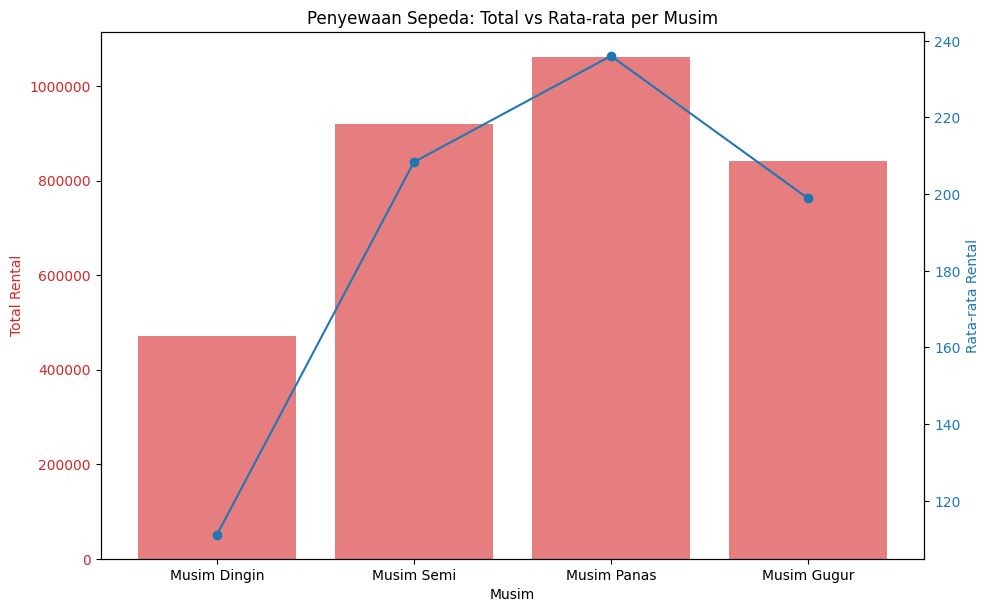

In [184]:
# Plotting Total and Average Rentals by Season
fig, ax1 = plt.subplots(figsize=(10, 6))

def millions_formatter(x, pos):
    return f'{int(x)}'

color = 'tab:red'
ax1.set_xlabel('Musim')
ax1.set_ylabel('Total Rental', color=color)
ax1.bar(comparison_seasons['season'], comparison_seasons['Total Rentals'], color=color, alpha=0.6, label='Total Rentals')
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax2 = ax1.twinx() # This is for plotting average rentals on the same plot
color = 'tab:blue'
ax2.set_ylabel('Rata-rata Rental', color=color)  # we already handled the x-label with ax1
ax2.plot(comparison_seasons['season'], comparison_seasons['Average Rentals'], color=color, marker='o', label='Average Rentals')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Penyewaan Sepeda: Total vs Rata-rata per Musim')
plt.xticks(comparison_seasons['season'], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

- Bar Chart menggambarkan jumlah total penyewaan sepeda setiap musim. Visualisasi menyatakan bahwa total penyewaan sepeda meningkat dari musim dingin ke musim semi dan mencapai puncaknya pada musim panas sebelum sedikit menurun pada musim gugur. Hal ini menunjukkan adanya pola dalam musim untuk total penyewaan sepeda, dengan musim panas yang memiliki total penyewaan terbanyak, dan sebaliknya musim dingin menjadi musim yang paling sepi dalam segi total penyewaan sepeda

- Line Chart menunjukkan rata-rata penyewaan sepeda setiap musim. Mengikuti pola yang sama dengan total penyewaan sepeda, dengan rata-rata tertinggi terjadi di musim panas dan terendah di musim dingin.

### Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda? 

<Figure size 2000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')

(-1.0999984335728534, 1.09999991552894, -1.0999963401774, 1.099999779293437)

<Axes: >

Text(0.5, 1.0, 'Rata Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')

(-1.0999930163237663,
 1.0999993886393817,
 -1.0999993666005174,
 1.099998462133632)

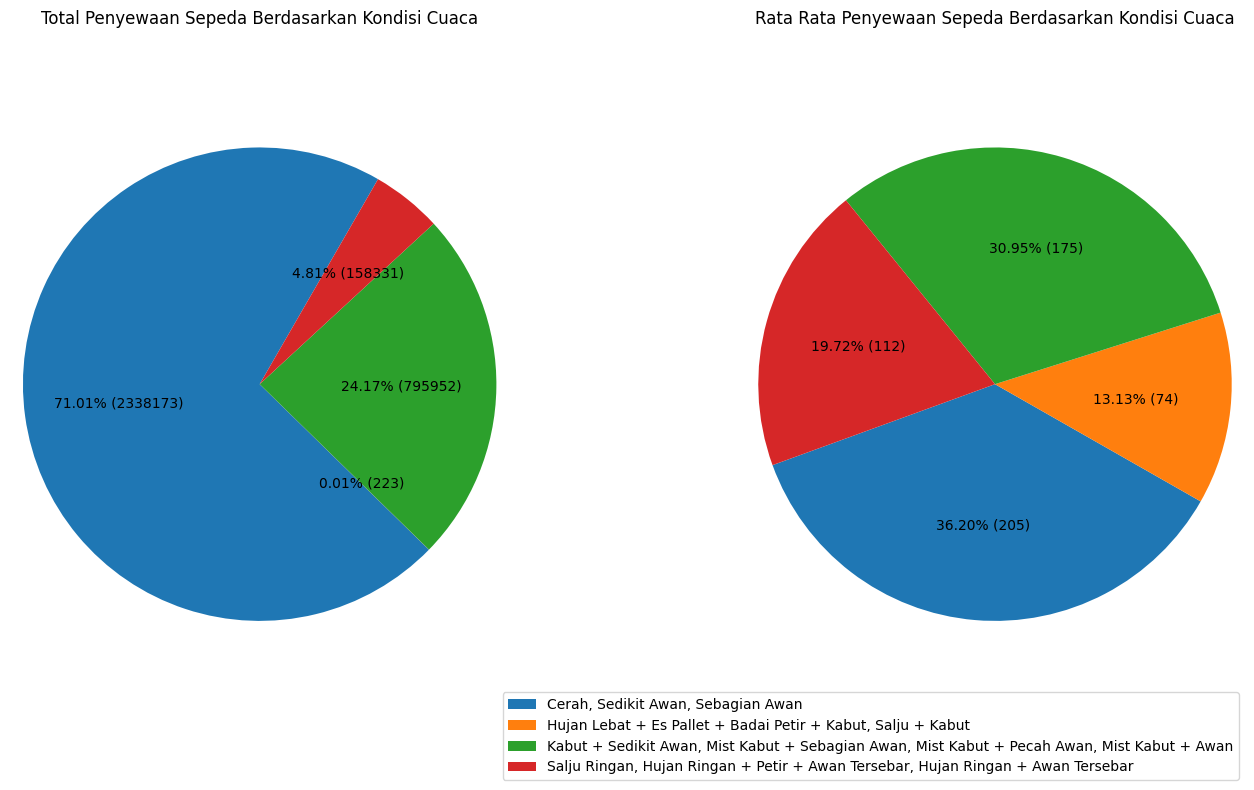

In [185]:
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plotting the sum counts of bike rentals in a pie chart
plt.figure(figsize=(20, 8))

# Plot for sum
plt.subplot(1, 3, 1)
patches, texts, autotexts = plt.pie(weather_agg_sum['cnt'],
        autopct=autopct_format(weather_agg_sum['cnt']), startangle=60)
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.axis('equal')

# Plot for mean
plt.subplot(1, 3, 2)
patches, texts, autotexts = plt.pie(weather_agg_mean['cnt'],
        autopct=autopct_format(weather_agg_mean['cnt']), startangle=200)
plt.title('Rata Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.axis('equal')

# Adjust legend
plt.legend(patches, weather_agg_sum['weathersit_descriptive'], loc='center left', bbox_to_anchor=(-0.5, 0))

# Show the plots
plt.tight_layout()
plt.show()

##### Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
- Mayoritas penyewaan sepeda terjadi pada saat kondisi cuaca cerah atau sebagian berawan, yaitu sebesar 71,01% dari total penyewaan sepeda. Hal ini menunjukkan bahwa kondisi cuaca yang mendukung secara signifikan mendorong penyewaan sepeda.
- Segmen terbesar berikutnya adalah penyewaan selama kondisi "Kabut + Mendung, Kabut + Awan Pecah, Kabut + Sedikit awan, Kabut", yang mencapai 24,17%. Meskipun kurang ideal, kondisi ini masih memiliki jumlah penyewaan yang cukup besar, yang menunjukkan bahwa cuaca buruk ringan tidak menjadi penghalang yang kuat.
- "Salju Ringan, Hujan Ringan + Badai Petir + Awan yang tersebar, Hujan Ringan + Awan yang tersebar" mencapai 4,81%, yang menunjukkan penurunan tetapi masih merupakan jumlah penyewaan yang cukup besar selama cuaca buruk ringan.
- Penyewaan selama "Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut" sangat jarang terjadi, yaitu sebesar 0,01%, yang mengindikasikan bahwa kondisi buruk seperti itu sangat tidak memungkinkan untuk menyewa sepeda.

##### Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
- Distribusi rata-rata penyewaan di berbagai kondisi cuaca tampak lebih merata, yang menunjukkan bahwa pada hari-hari dengan kondisi cuaca seperti ini, jumlah rata-rata penyewaan tidak berbeda secara drastis seperti halnya jumlah total.
- Rata-rata terbesar terjadi pada kondisi "Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut", dengan 36,20% rata-rata penyewaan, yang mungkin mengindikasikan bahwa rata-rata orang masih menyewa sepeda pada hari-hari berkabut, mungkin karena cuaca yang umum terjadi di daerah tersebut.
- Kondisi cerah atau sebagian berawan mencapai 30,95%, yang merupakan proporsi yang signifikan tetapi tidak sedominan pada grafik total penyewaan.
- Kondisi "Salju Ringan, Hujan Ringan + Badai Petir + Awan yang tersebar, Hujan Ringan + Awan yang tersebar" memiliki 19,72%, dan kondisi "Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut" memiliki 13,13%, yang menunjukkan bahwa jumlah rata-rata penyewaan pada hari-hari dengan kondisi ini tidak terlalu rendah dibandingkan dengan total penyewaan, mungkin karena lebih sedikitnya hari seperti itu dalam kumpulan data.

### Bagaimana suhu dan suhu yang dirasakan berkorelasi dengan jumlah penyewaan sepeda?

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Korelasi antara Variabel Suhu, Sensasi Suhu, dan Jumlah Rental')

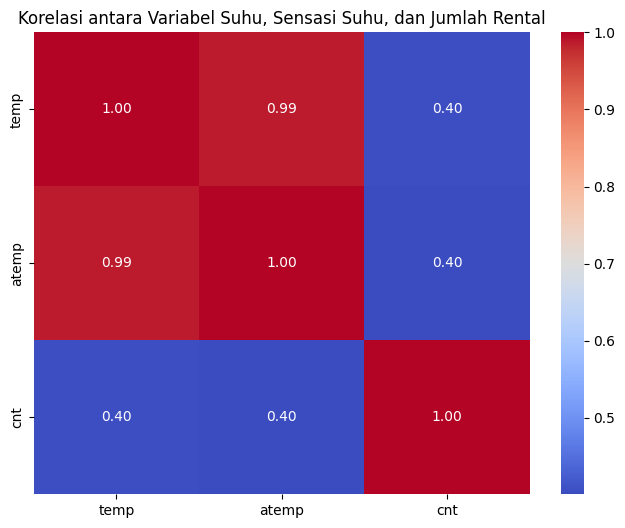

<Figure size 2000x800 with 0 Axes>

<Axes: >

/var/folders/qm/z0yg337s2z7fff1kbsxn50x40000gn/T/ipykernel_29432/3067514307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_category', y='cnt_sum', data=comparison_temp_category, palette='coolwarm')


<Axes: xlabel='temp_category', ylabel='cnt_sum'>

Text(0.5, 1.0, 'Total Penyewaan Sepeda berdasarkan Kategori Suhu')

Text(0.5, 0, 'Kategori Suhu')

Text(0, 0.5, 'Total Rentals')

<Axes: >

/var/folders/qm/z0yg337s2z7fff1kbsxn50x40000gn/T/ipykernel_29432/3067514307.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='atemp_category', y='cnt_sum', data=comparison_atemp_category, palette='coolwarm')


<Axes: xlabel='atemp_category', ylabel='cnt_sum'>

Text(0.5, 1.0, 'Total Penyewaan Sepeda berdasarkan Kategori Sensasi Suhu')

Text(0.5, 0, 'Kategori Sensasi Suhu')

Text(0, 0.5, 'Total Rental')

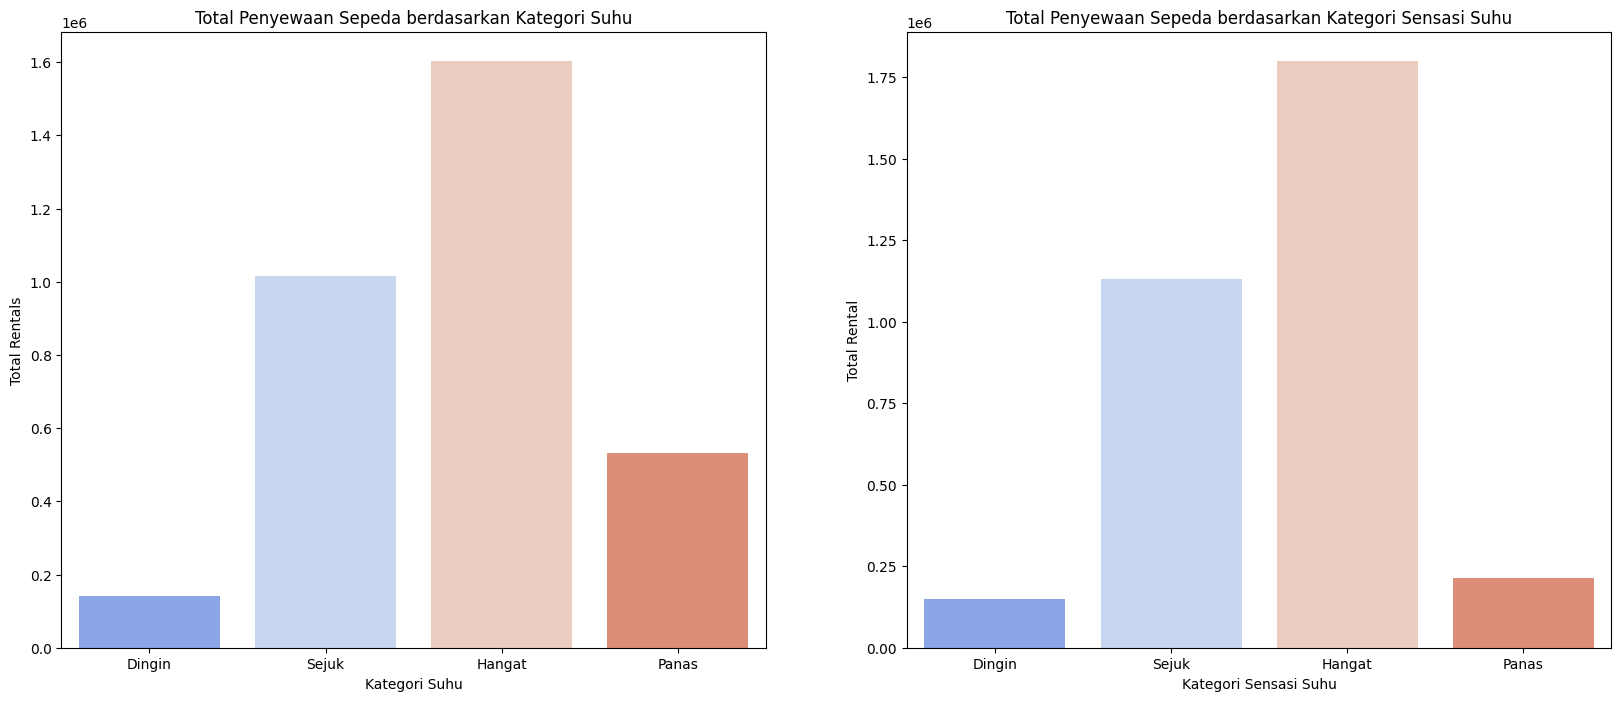

In [186]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel Suhu, Sensasi Suhu, dan Jumlah Rental')
plt.show()

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='temp_category', y='cnt_sum', data=comparison_temp_category, palette='coolwarm')
plt.title('Total Penyewaan Sepeda berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Total Rentals')

plt.subplot(1, 2, 2)
sns.barplot(x='atemp_category', y='cnt_sum', data=comparison_atemp_category, palette='coolwarm')
plt.title('Total Penyewaan Sepeda berdasarkan Kategori Sensasi Suhu')
plt.xlabel('Kategori Sensasi Suhu')
plt.ylabel('Total Rental')
plt.show()


- Berdasarkan heatmap:
1. Korelasi temp dan atemp (0,987672) menunjukkan bahwa temperatur dan temperatur yang dirasakan memiliki korelasi yang sangat tinggi. Ketika suhu aktual naik atau turun, suhu yang dirasakan juga melakukan hal yang sama pada tingkat yang sangat mirip. Hal ini diharapkan karena suhu yang dirasakan dirancang untuk memperkirakan bagaimana suhu yang sebenarnya dirasakan oleh manusia.
2. Data korelasi menunjukkan bahwa suhu aktual (suhu) dan perasaan (atemp) memiliki korelasi positif "moderate" dengan persewaan sepeda. Ketika suhu semakin hangat, semakin banyak orang yang cenderung menyewa sepeda. Namun korelasi tersebut tidak terlalu kuat (0,4), sehingga menunjukkan bahwa ada faktor lain yang juga berperan penting dalam memengaruhi jumlah penyewaan sepeda.

- Hal ini dibuktikan dengan bar chart yang menunjukkan bahwa adanya korelasi antara temp and atemp (temperatur dan temperatur yang dirasakan) yang sangat kuat, dan juga ada efeknya ke dalam jumlah penyewaan sepeda

### Bagaimana tren penyewaan sepeda dari tahun ke tahun? Bulan dan tahun manakah yang memiliki permintaan penyewaan sepeda tertinggi/terendah?

<BarContainer object of 24 artists>

Text(0.5, 0, 'Year-Month (YYYY-MM)')

Text(0, 0.5, 'Total Rental')

Text(0, 0.5, 'Trend')

Text(0.5, 1.0, 'Bike Rentals: Total and Trend Over Time')

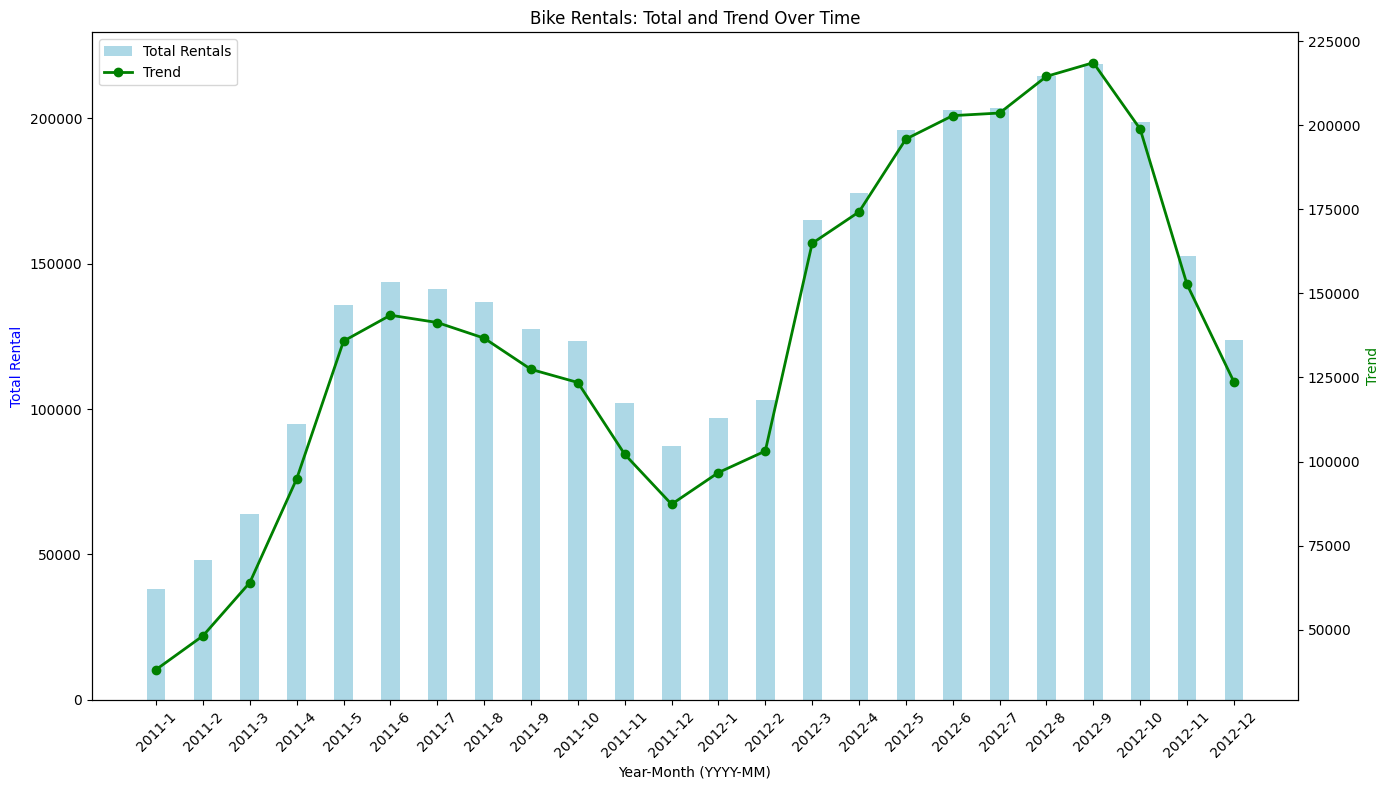

In [187]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Assuming 'Total Rentals' is indexed by a MultiIndex of (year, month), we'll first need to reset it for plotting
monthly_rentals_reset = monthly_rentals.reset_index()  # This converts 'Year' and 'Month' from MultiIndex to columns
monthly_rentals_reset['Year-Month'] = monthly_rentals_reset['Year'].astype(str) + '-' + monthly_rentals_reset['Month'].astype(str)

# Bar chart
ax1.bar(monthly_rentals_reset['Year-Month'], monthly_rentals_reset['Total Rentals'], color='lightblue', label='Total Rentals', width=0.4)

# Creating ax2 for the line chart using the same x-axis but a different y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_rentals_reset['Year-Month'], monthly_rentals_reset['Total Rentals'], color='green', label='Trend', marker='o', linewidth=2)

# Titles and labels
ax1.set_xlabel('Year-Month (YYYY-MM)')
ax1.set_ylabel('Total Rental', color='blue')
ax2.set_ylabel('Trend', color='green')
ax1.set_title('Bike Rentals: Total and Trend Over Time')
ax1.tick_params(axis='x', rotation=45)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

- Visualisasi menunjukkan bahwa penyewaan sepeda mempunyai total yang dinamis. Namun, di kedua tahun tersebut terdapat pola dimana selalu ada peningkatan dipertengahan tahun, dan adanya penurunan di akhir tahun. Ini mengindikasikan bahwa pada pertengahan tahun (bulan Mei hingga Oktober) jumlah orang yang menyewa sepeda meningkat
- Tahun 2012 memiliki jumlah penyewaan lebih banyak dibandingkan dengan tahun 2011. 

### Bagaimana kecepatan angin mempengaruhi penyewaan sepeda? 

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation between Wind Speed and Bike Rentals')

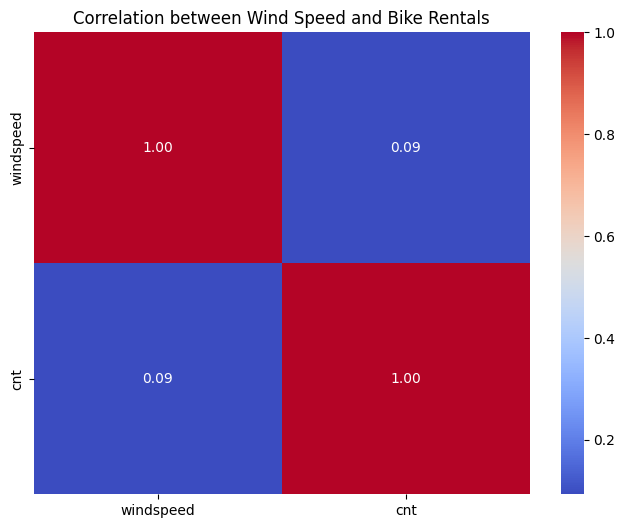

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='windspeed_category', ylabel='cnt'>

Text(0.5, 1.0, 'Effect of Wind Speed on Average Bike Rentals')

Text(0.5, 0, 'Wind Speed Category')

Text(0, 0.5, 'Average Bike Rentals')

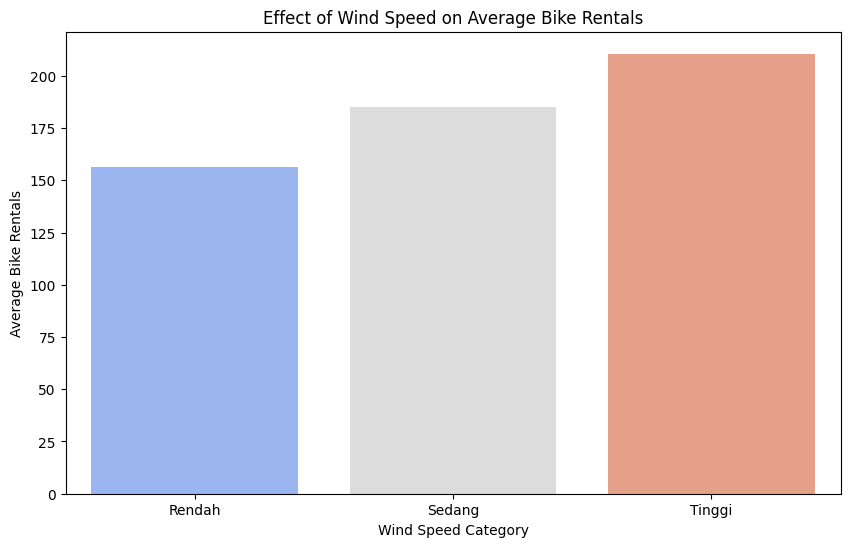

In [188]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_wind_count, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Wind Speed and Bike Rentals')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='windspeed_category', y='cnt', hue='windspeed_category', data=windspeed_effect, palette='coolwarm')
plt.title('Effect of Wind Speed on Average Bike Rentals')
plt.xlabel('Wind Speed Category')
plt.ylabel('Average Bike Rentals')
plt.show()

- Berdasarkan hasil visualisasi heat map, koefisien korelasi antara kecepatan angin dan jumlah penyewaaa sepeda adalah 0,09, menunjukkan hubungan linier positif yang sangat lemah antara kecepatan angin dan jumlah penyewaan sepeda. Hal ini berarti bahwa ketika kecepatan angin meningkat, terdapat sedikit efek positif terhadap jumlah penyewaan sepeda, namun efeknya sangat lemah sehingga tidak dapat dianggap signifikan atau praktis untuk tujuan prediksi.
- Hal ini dibuktikan pada jumlah penyewaan sepeda yang tidak signifikan berubah, namun terlihat adanya peningkatan secara konstan.

### Siapa yang lebih banyak menggunakan layanan penyewaan sepeda, pengguna biasa atau pengguna terdaftar? 

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='month', ylabel='Count'>

Text(0.5, 1.0, 'Bike Rentals: Casual vs. Registered Users')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

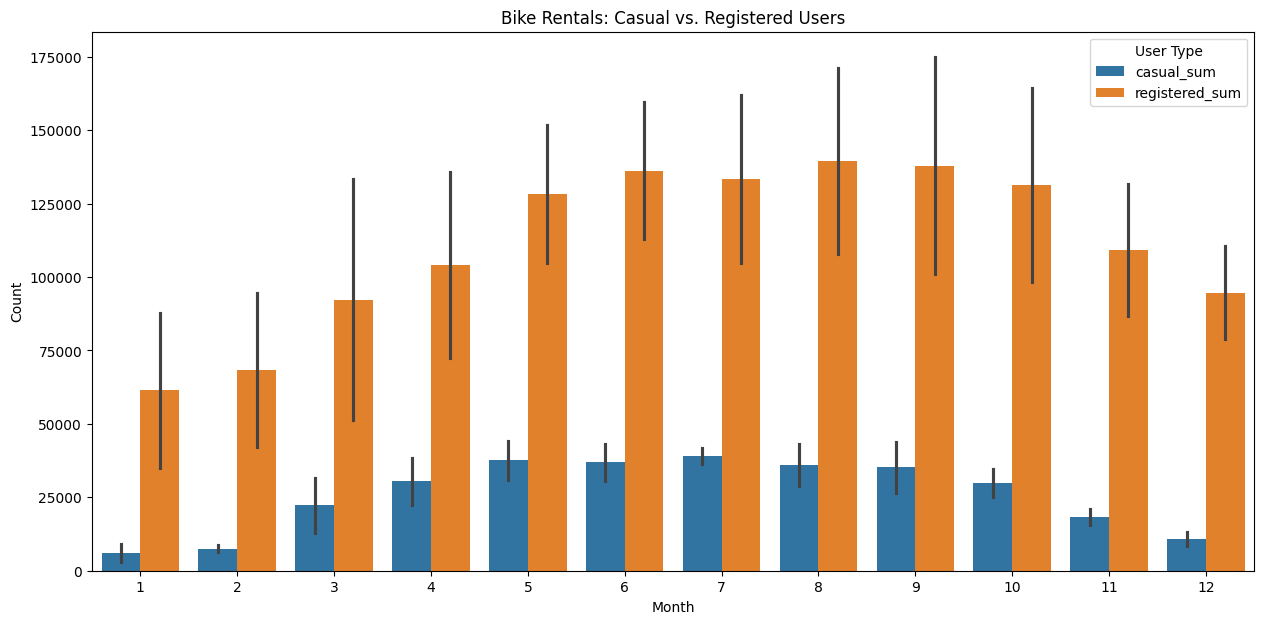

In [189]:
plt.figure(figsize=(15, 7))

# Create the bar plot
sns.barplot(x='month', y='Count', hue='User_Type', data=user_comparison_melted)

# Set the title and labels
plt.title('Bike Rentals: Casual vs. Registered Users')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='User Type')

- Hasil visualisasi menunjukkan bahwa yang lebih banyak melakukan penyewaan sepeda adalah pengguna yang telah teregistrasi. Ini dibuktikan dengan hasil "registered users" jauh lebih dominan dibandingkan dengan "casual users"

### Pada jam berapa saja penyewaan sepeda memiliki pengguna terbanyak dan tersedikit?

<Figure size 1200x600 with 0 Axes>

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Total User'),
 Text(0.5, 1.0, 'Distribution of Bike Rentals Per Hour')]

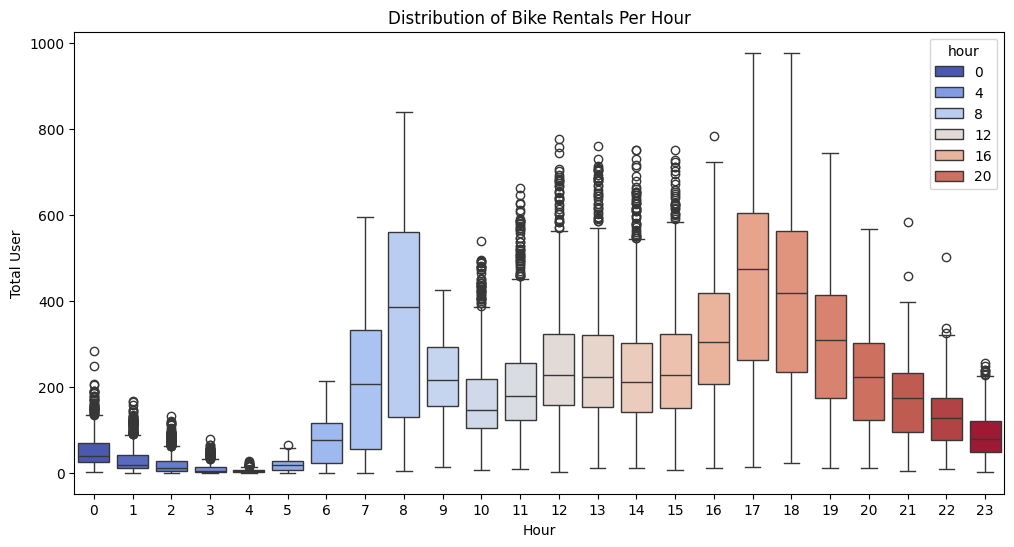

<Figure size 1800x600 with 0 Axes>

<Axes: xlabel='hour', ylabel='cnt_sum'>

Text(0.5, 0, 'Jam dalam Sehari')

Text(0, 0.5, 'Total Rentals (Jumlah)')

Text(0.5, 1.0, 'Total Rental (Jumlah dan Rata-Rata) per Jam')

<Axes: xlabel='hour', ylabel='cnt_mean'>

Text(0, 0.5, 'Total Rental (Rata - Rata)')

(0.0, 507.59726027397267)

<Axes: xlabel='hour', ylabel='casual_sum'>

Text(0.5, 0, 'Jam dalam Sehari')

Text(0, 0.5, 'Casual Rentals (Jumlah)')

Text(0.5, 1.0, 'Casual Rentals (Jumlah dan Rata-rata) per Jam')

<Axes: xlabel='hour', ylabel='casual_mean'>

Text(0, 0.5, 'Casual Rentals (Rata-rata)')

(0.0, 83.12469135802469)

<Axes: xlabel='hour', ylabel='registered_sum'>

Text(0.5, 0, 'Jam dalam Sehari')

Text(0, 0.5, 'Registered Rentals (Jumlah)')

Text(0.5, 1.0, 'Registered Rentals (Jumlah dan Rata-rata) per Hour')

<Axes: xlabel='hour', ylabel='registered_mean'>

Text(0, 0.5, 'Registered Rentals (Rata-rata)')

(0.0, 425.89589041095894)

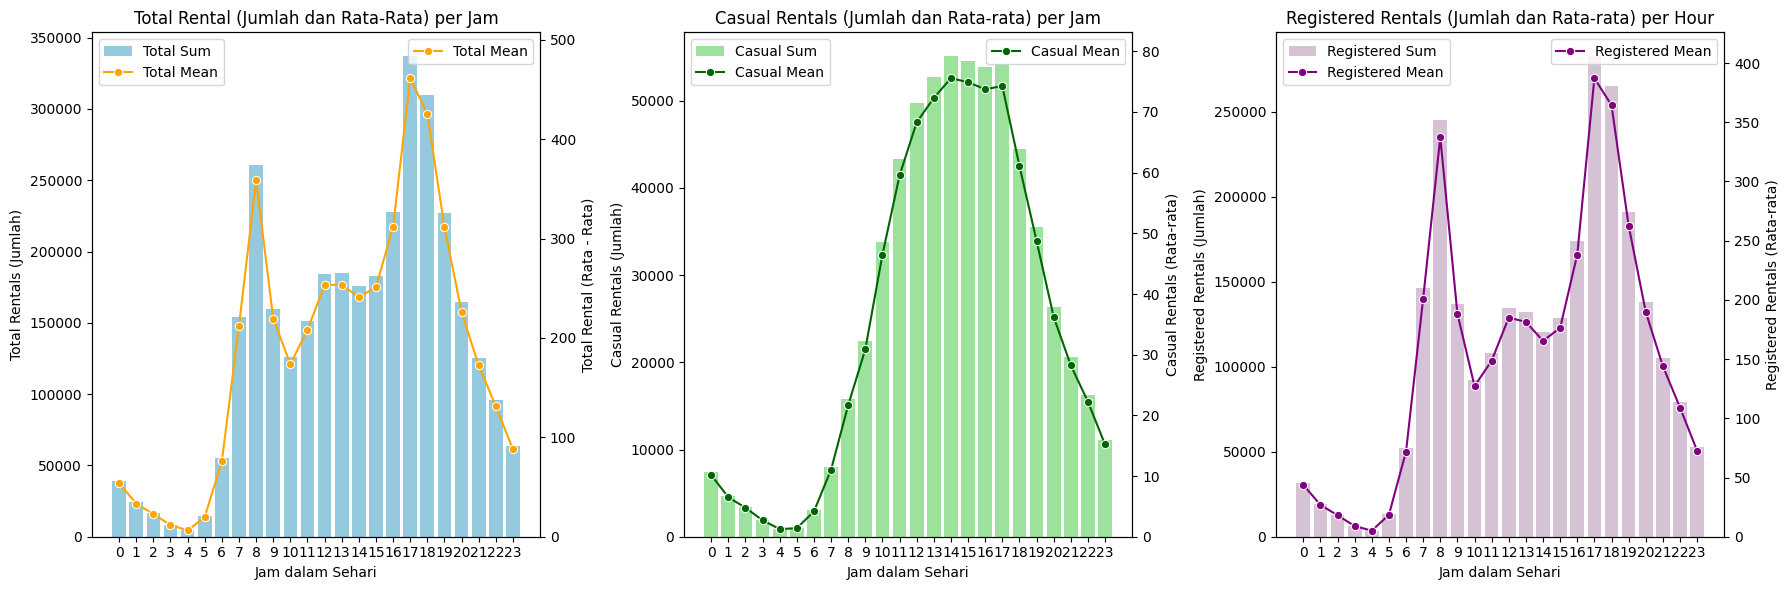

In [197]:
plt.figure(figsize=(12,6))
boxplot_hour = sns.boxplot(x=hour, y='cnt', hue=hour, data=df_combined_clean, palette='coolwarm')
boxplot_hour.set(xlabel ="Hour", ylabel = "Total User", title ='Distribution of Bike Rentals Per Hour')

# Loop through each box to annotate the median
for patch in boxplot_hour.artists:
    # Get the data from the patch
    x, y = patch.get_xdata(), patch.get_ydata()
    median_value = np.median(y)
    
    # Place a text annotation on the median line
    boxplot_hour.text(x[0] + patch.get_width() / 2, median_value, f'{median_value:.1f}', 
            ha='center', va='center', fontweight='bold', color='white', fontsize=8)

plt.show()

plt.figure(figsize=(18, 6))

# Total Rentals (Sum & Mean) per Hour
ax1 = plt.subplot(1, 3, 1)
sns.barplot(x='hour', y='cnt_sum', data=average_hourly_user, color='skyblue', label='Total Sum')
ax1.set_xlabel('Jam dalam Sehari')
ax1.set_ylabel('Total Rentals (Jumlah)')
ax1.set_title('Total Rental (Jumlah dan Rata-Rata) per Jam')

# Create a second y-axis for mean values
ax2 = ax1.twinx()
sns.lineplot(x='hour', y='cnt_mean', data=average_hourly_user, marker='o', color='orange', label='Total Mean', ax=ax2)
ax2.set_ylabel('Total Rental (Rata - Rata)')
ax2.set_ylim(0, average_hourly_user['cnt_mean'].max() * 1.1)  # Adjust the scale for visibility

# Add legend for the first subplot
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

# Casual Rentals (Sum & Mean) per Hour
ax3 = plt.subplot(1, 3, 2)
sns.barplot(x='hour', y='casual_sum', data=average_hourly_user, color='lightgreen', label='Casual Sum')
ax3.set_xlabel('Jam dalam Sehari')
ax3.set_ylabel('Casual Rentals (Jumlah)')
ax3.set_title('Casual Rentals (Jumlah dan Rata-rata) per Jam')

# Create a second y-axis for mean values
ax4 = ax3.twinx()
sns.lineplot(x='hour', y='casual_mean', data=average_hourly_user, marker='o', color='darkgreen', label='Casual Mean', ax=ax4)
ax4.set_ylabel('Casual Rentals (Rata-rata)')
ax4.set_ylim(0, average_hourly_user['casual_mean'].max() * 1.1)  # Adjust the scale for visibility

# Add legend for the second subplot
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()
ax3.legend(h3+h4, l3+l4, loc='upper left')

# Registered Rentals (Sum & Mean) per Hour
ax5 = plt.subplot(1, 3, 3)
sns.barplot(x='hour', y='registered_sum', data=average_hourly_user, color='thistle', label='Registered Sum')
ax5.set_xlabel('Jam dalam Sehari')
ax5.set_ylabel('Registered Rentals (Jumlah)')
ax5.set_title('Registered Rentals (Jumlah dan Rata-rata) per Hour')

# Create a second y-axis for mean values
ax6 = ax5.twinx()
sns.lineplot(x='hour', y='registered_mean', data=average_hourly_user, marker='o', color='purple', label='Registered Mean', ax=ax6)
ax6.set_ylabel('Registered Rentals (Rata-rata)')
ax6.set_ylim(0, average_hourly_user['registered_mean'].max() * 1.1)  # Adjust the scale for visibility

# Add legend for the third subplot
h5, l5 = ax5.get_legend_handles_labels()
h6, l6 = ax6.get_legend_handles_labels()
ax5.legend(h5+h6, l5+l6, loc='upper left')

plt.tight_layout()
plt.show()


- Jam dengan median tertinggi (garis di dalam setiap kotak) dan kotak terbesar (menunjukkan variabilitas yang lebih tinggi tetapi juga kecenderungan sentral yang lebih tinggi) menunjukkan waktu puncak penyewaan (pada jam 7 - 8 pagi dan jam 5 sore - 7 malam). Ini kemungkinan besar terjadi pada jam-jam perjalanan atau saat aktivitas rekreasi umum dilakukan.
- Jam-jam awal pagi hari (sekitar pukul 0 hingga 6 pagi) menunjukkan median yang jauh lebih rendah dan kotak yang lebih kecil, yang mengindikasikan lebih sedikit penyewaan. Hal ini diperkirakan karena jam-jam tersebut umumnya merupakan jam-jam di luar jam sibuk ketika orang tidak terlalu sering bepergian atau melakukan aktivitas di luar ruangan.
- Jam malam tampaknya memiliki median yang lebih rendah tetapi masih memiliki jumlah persewaan yang signifikan, yang bisa jadi merupakan indikasi orang yang pulang kerja atau keluar di malam hari.
- Secara spesifik, perbandingan antara pengguna yang tidak terdaftar dan terdaftar memiliki range peak hour yang berbeda. Pada casual users, peak hour berada di jam 11 siang - 6 sore, sedangkan pada registered users peak hour berada di jam 8 pagi dan di kisaran jam 4 sore - 7 malam.

## Conclusion

### Pertanyaan 1 
#### Apa dampak hari libur terhadap jumlah penyewaan sepeda? 
- Data menunjukkan bahwa penyewaan sepeda lebih banyak dilakukan di bukan hari libur, hal ini bisa diindikasikkan bahwa sepeda dijadikan sebagai alat transportasi sehari - hari. Adapun beberapa bulan terhitung lebih banyak digunakan pada saat hari libur, ini bisa disebabkan banyak orang yang menggunakan sepeda sebagai media rekreasi.

### Pertanyaan 2
#### Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Berdasarkan hasil data dan visualisasi, musim panas memiliki tingkat penyewaan sepeda tertinggi baik dalam jumlah total maupun rata-rata, sementara musim dingin memiliki tingkat penyewaan terendah. Ada pola musiman yang jelas di mana penyewaan sepeda meningkat dari musim dingin ke musim panas dan kemudian menurun pada musim gugur.

### Pertanyaan 3
#### Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda? 
- Data menyatakan bahwa kondisi cuaca yang baik, terutama cuaca cerah atau sebagian berawan, sangat mendukung aktivitas penyewaan sepeda, terbukti dengan jumlah penyewaan tertinggi dibandingkan dengan yang lain. Penyewaan masih terjadi dalam jumlah yang signifikan pada kondisi cuaca kurang ideal seperti berkabut, sedangkan kondisi cuaca buruk seperti hujan lebat sangat menurunkan jumlah penyewaan sepeda. Rata-rata penyewaan cenderung lebih merata di semua kondisi cuaca, menunjukkan bahwa meskipun kondisi cuaca mempengaruhi keputusan menyewa sepeda, orang-orang masih menyewa sepeda dalam berbagai kondisi cuaca hingga batas tertentu.

### Pertanyaan 4
#### Bagaimana suhu dan suhu yang dirasakan berkorelasi dengan jumlah penyewaan sepeda?
- Suhu sebenarnya dan suhu yang dirasakan sangat berkorelasi satu sama lain, yang mengindikasikan bahwa kedua pengukuran tersebut naik dan turun bersamaan. Selain itu, ada hubungan positif antara suhu dengan jumlah penyewaan sepeda, meskipun hubungan ini tidak terlalu kuat, menandakan bahwa faktor lain juga mempengaruhi keputusan untuk menyewa sepeda.

### Pertanyaan 5
#### Bagaimana tren penyewaan sepeda dari tahun ke tahun? Bulan dan tahun manakah yang memiliki permintaan penyewaan sepeda tertinggi/terendah?
- Ada pola musiman dalam penyewaan sepeda, dengan peningkatan jumlah penyewaan di pertengahan tahun dan penurunan di akhir tahun, menunjukkan lebih banyak aktivitas penyewaan sepeda selama bulan-bulan yang lebih hangat. Selain itu, tahun 2012 mengalami peningkatan jumlah penyewaan sepeda dibandingkan tahun 2011.

### Pertanyaan 6
#### Bagaimana kecepatan angin mempengaruhi penyewaan sepeda? 
- Kecepatan angin memiliki pengaruh yang sangat kecil dan hampir tidak signifikan terhadap jumlah penyewaan sepeda.

### Pertanyaan 7
#### Siapa yang lebih banyak menggunakan layanan penyewaan sepeda, pengguna biasa atau pengguna terdaftar? 
- Hasil menunjukkan bahwa yang lebih banyak melakukan penyewaan sepeda adalah pengguna yang telah teregistrasi. 

### Pertanyaan 8
#### Pada jam berapa saja penyewaan sepeda memiliki pengguna terbanyak dan tersedikit?
- Waktu puncak penyewaan sepeda terjadi selama jam berangkat dan pulang kerja, serta jam-jam rekreasi sore hari. Aktivitas penyewaan sepeda lebih rendah di jam-jam dini hari dan malam. Selain itu, terdapat perbedaan pola penyewaan antara pengguna kasual dan terdaftar, dengan pengguna kasual cenderung menyewa sepeda pada siang hingga sore hari, sedangkan pengguna terdaftar lebih banyak menyewa pada jam sibuk pagi dan sore.